In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train_path = '/kaggle/input/santander-customer-transaction-prediction/train.csv'
df_train = pd.read_csv(train_path)

In [43]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [44]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [45]:
is_any_nan = df_train.isna().any().any()
print(is_any_nan)

False


In [46]:
target_balance = df_train['target'].value_counts() / len(df_train)
print(target_balance)

target
0    0.89951
1    0.10049
Name: count, dtype: float64


In [47]:
features = [col for col in df_train.columns if col.startswith('var_')]

In [48]:
df_train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature_cols = [col for col in df_train.columns if col.startswith('var_')]

df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])

In [50]:
df_train.head(1)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.53643,-0.334926,0.608751,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135


In [53]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "boosting": 'gbdt',
    "max_depth": -1,
    "num_leaves": 31,
    "learning_rate": 0.01,
    "bagging_freq": 5,
    "bagging_fraction": 0.2,
    "feature_fraction": 0.1,
    "min_data_in_leaf": 100,
    "tree_learner": "data",
    "boost_from_average": "false",
    "verbosity": 1
}

X = df_train.drop(['ID_code', 'target'], axis=1)
y = df_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=33)

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
lgb_model = lgb.train(lgb_params, train_data, valid_sets=[val_data], num_boost_round=10000)

[LightGBM] [Info] Number of positive: 12153, number of negative: 107847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.134496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 200


In [54]:
importance_df = pd.DataFrame()
importance_df['feature'] = X_train.columns
importance_df['importance'] = lgb_model.feature_importance(importance_type='gain')

top_features = importance_df.sort_values(by='importance', ascending=False).head(20)['feature']
print(top_features)

146    var_146
174    var_174
6        var_6
166    var_166
110    var_110
26      var_26
22      var_22
78      var_78
2        var_2
94      var_94
34      var_34
18      var_18
170    var_170
154    var_154
122    var_122
118    var_118
86      var_86
162    var_162
190    var_190
114    var_114
Name: feature, dtype: object


In [55]:
y_val_pred_proba = lgb_model.predict(X_val)

from sklearn.metrics import classification_report

y_val_pred = (y_val_pred_proba >= 0.5).astype(int) 
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     72055
           1       0.75      0.34      0.47      7945

    accuracy                           0.92     80000
   macro avg       0.84      0.67      0.72     80000
weighted avg       0.91      0.92      0.91     80000



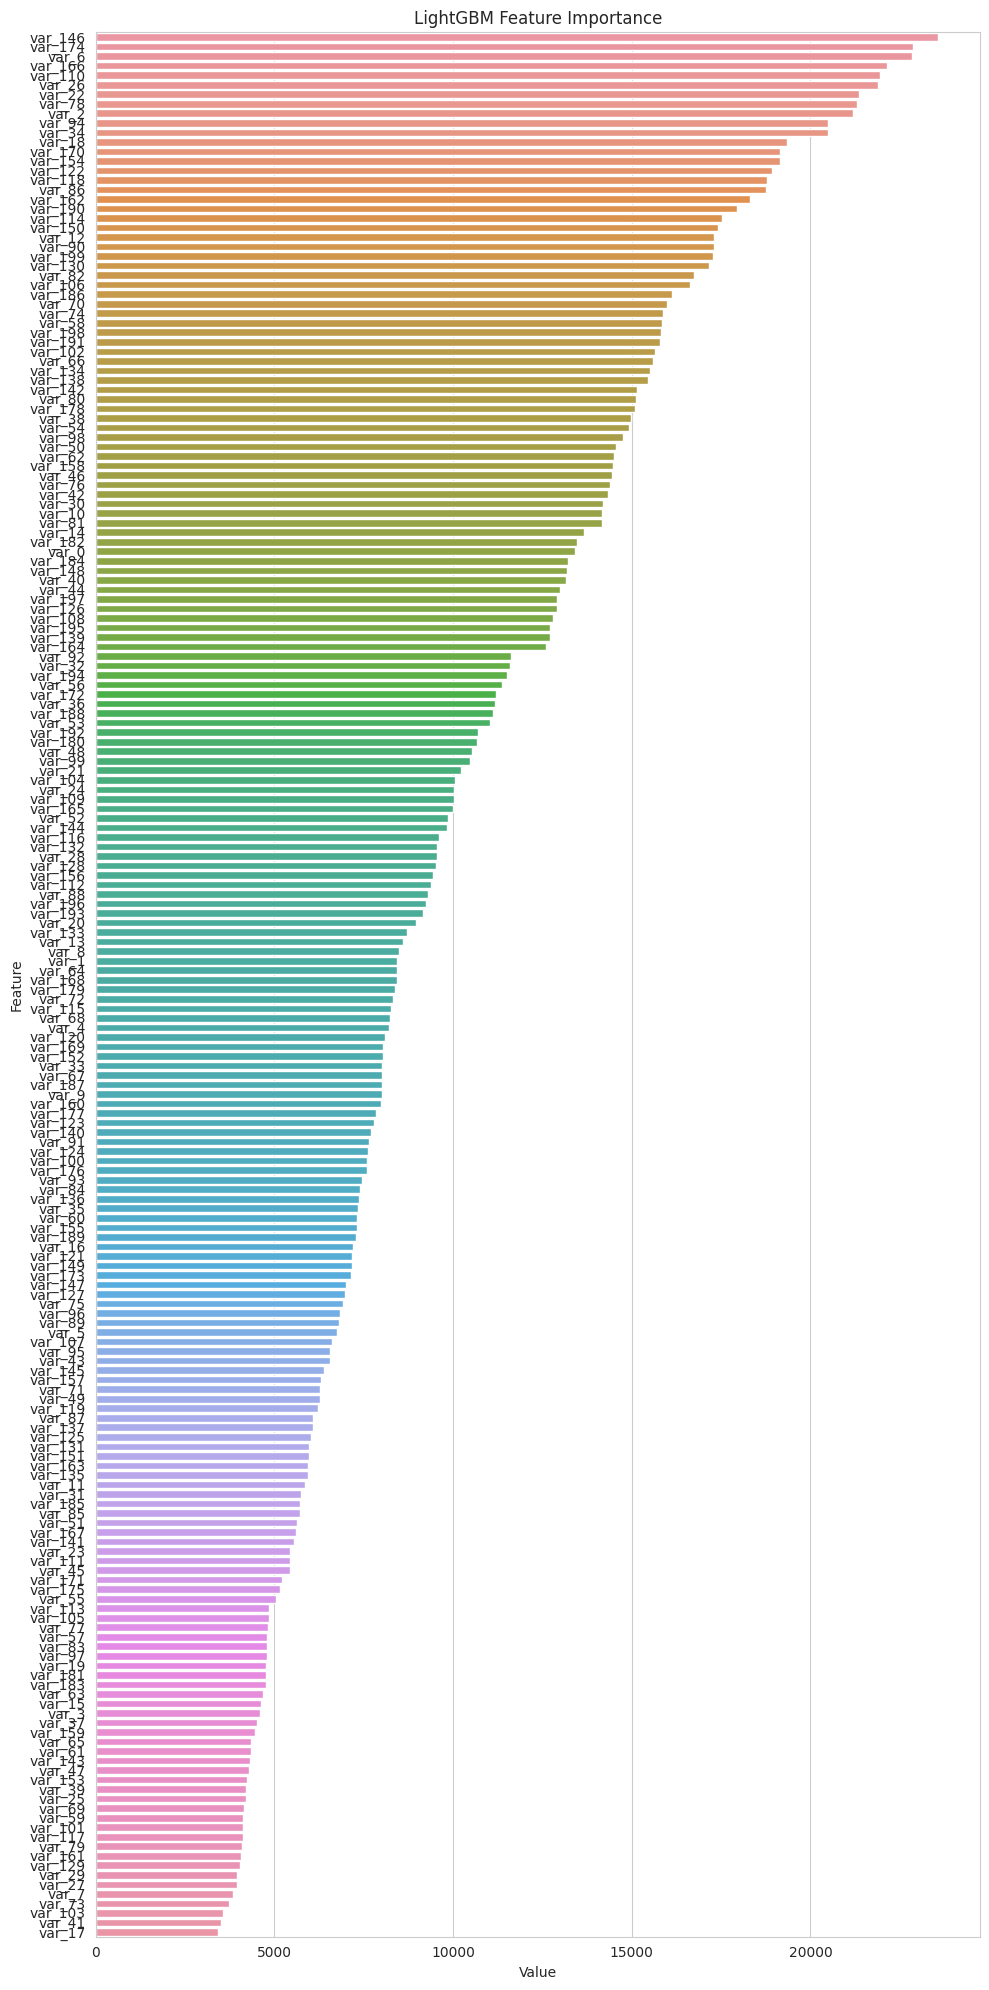

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importance(importance_type='gain'), X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

In [57]:
df_test = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [59]:
df_test[feature_cols] = scaler.transform(df_test[feature_cols])

In [60]:
test_pred_proba = lgb_model.predict(df_test[feature_cols])

submission = pd.DataFrame({'ID_code': df_test['ID_code'], 'target': test_pred_proba})
submission.to_csv('submission.csv', index=False)

print('submitted successfully')

submitted successfully
